In [95]:
import math 
import random
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


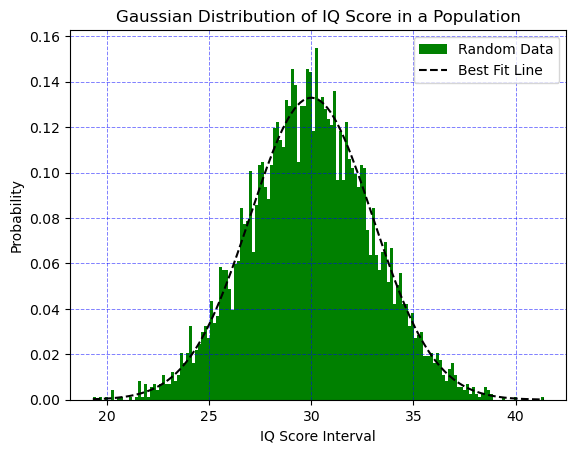

In [126]:
Mean, stdev = 30, 3
g = np.random.normal(Mean, stdev, 5000)
count, bins, ignored = plt.hist(g, 150, density = True, color = 'g', label = 'Random Data')
normdist = 1/( np.sqrt(2 * np.pi*stdev**2)) *np.exp( - (bins - Mean)**2 / (2 * stdev**2) )
plt.plot(bins, normdist, linewidth = 1.5, color = 'k', linestyle = 'dashed', label = 'Best Fit Line')
plt.xlabel(r"IQ Score Interval")
plt.ylabel(r"Probability")
plt.title(r"Gaussian Distribution of IQ Score in a Population")
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.legend()
plt.savefig('Gaussian.pdf')
plt.show()

In [106]:
Nmeas, Nexp = 10, 5000
sigma = 3.0

mu_best = []
mu_true = []

for i in range(0, 151):
    mu_true_val = float(i)/20.0
    
    for e in range(Nexp):
        mu_best_val = 0.0
        
        for m in range(Nmeas):
            x = random.gauss(mu_true_val, sigma)
            mu_best_val += x
                        
        mu_best_val = mu_best_val / float(Nmeas)
        
        mu_best.append(mu_best_val)
        mu_true.append(mu_true_val)
        
        
mu_best = np.array(mu_best)
mu_true = np.array(mu_true)



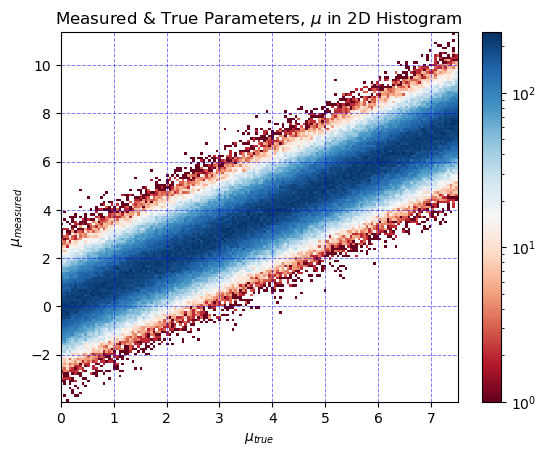

In [123]:
fig, ax = plt.subplots()
hist_mu = plt.hist2d(mu_true, mu_best, bins = 151, norm = LogNorm(), cmap = 'RdBu')   
plt.xlabel(r"$\mu_{true}$")
plt.ylabel(r"$\mu_{measured}$")
plt.title(r"Measured & True Parameters, $\mu$ in 2D Histogram")
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.colorbar(hist_mu[3], ax = ax)
plt.savefig('2D_Histogram_Mu.pdf')
plt.show()

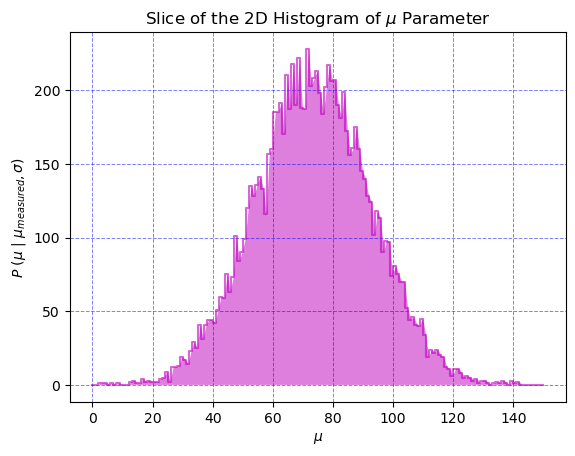

In [109]:
### Slice of the 2D Histogram of $\mu$ Parameter ###
plt.plot(hist_mu[0][:, 75], drawstyle = 'steps', color = 'm', alpha = 0.6)
plt.fill(hist_mu[0][:, 75], 'm', alpha = 0.5)
plt.xlabel(r'$\mu$')
plt.ylabel(r"$P ~ (\mu ~ | ~ \mu_{measured}, \sigma)$")
plt.title(r'Slice of the 2D Histogram of $\mu$ Parameter')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Slice_Mu.pdf')
plt.show()

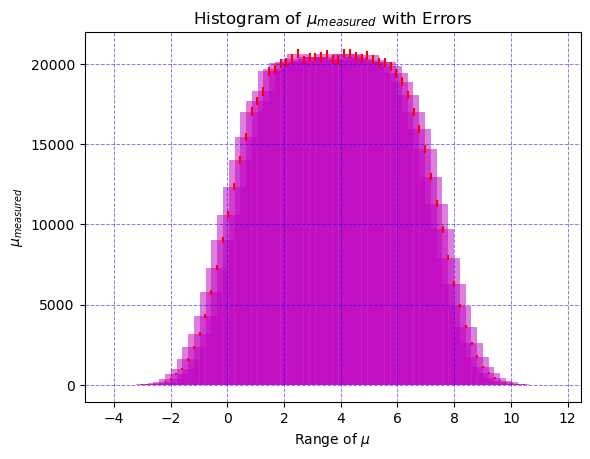

In [117]:
### Histogram of $\mu_{measured}$ with Errors ###
data = np.array(mu_best)
y, binEdges = np.histogram(data, bins = 75)
bincenters = 0.5*(binEdges[1:] + binEdges[:-1])
menStd = 2*np.sqrt(y)
plt.bar(bincenters, y, linewidth = 1, color = 'm', alpha = 0.5, yerr = menStd, ecolor = 'r')
plt.xlabel(r'Range of $\mu$')
plt.ylabel(r"$\mu_{measured}$")
plt.title(r'Histogram of $\mu_{measured}$ with Errors')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Measured_Mu_Error.pdf')
plt.show()

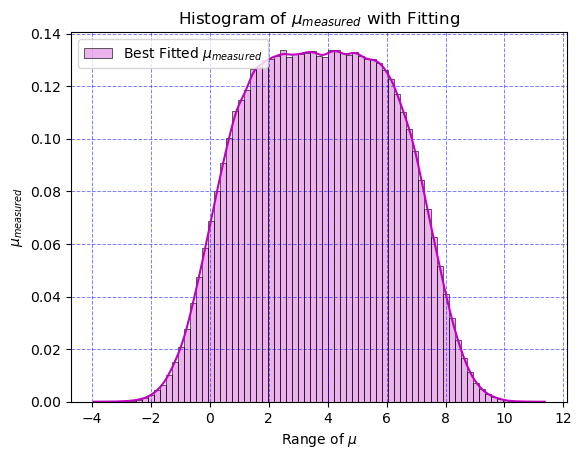

In [124]:
sns.histplot(data, bins=75, color='m', alpha = 0.3, label=r'Best Fitted $\mu_{measured}$', stat='density', kde=True)
plt.xlabel(r'Range of $\mu$')
plt.ylabel(r"$\mu_{measured}$") 
plt.title(r'Histogram of $\mu_{measured}$ with Fitting')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.7)
plt.savefig('Measured_Mu_Fit.pdf')
plt.legend()
plt.show()

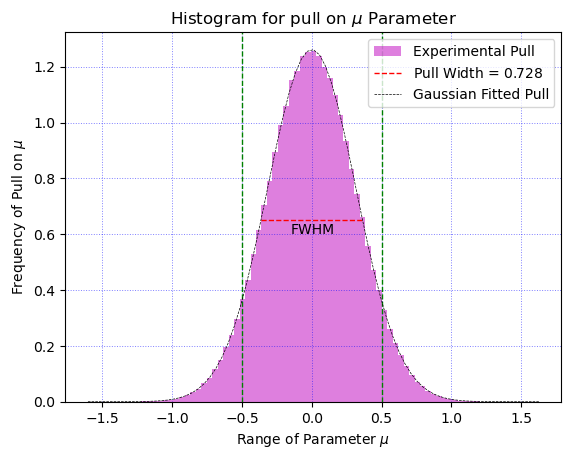

In [112]:
### Histogram for pull on $\mu$ Parameter: Gaussian Fit ###
pull_mu = (mu_best - mu_true)/(sigma)
plt.hist(pull_mu, 75, color = 'm', alpha = 0.5,  density = True, label = 'Experimental Pull')
plt.axvline(-0.5, linestyle = 'dashed', color='green', linewidth = 1)
plt.axvline(0.5, linestyle = 'dashed', color='green', linewidth = 1)
#plt.axhline(0.65, linestyle = 'dashed', color='r', linewidth = 1)
width = 0.365 + 0.363
plt.plot((-0.363, 0.365 ), (0.65, 0.65), 'r--', linewidth = 1, label = r'Pull Width = '+'${:.3f}$'.format(width))
plt.text(-0.15, .6, 'FWHM')
mu0, sigma0 = norm.fit(pull_mu)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 75)
p = norm.pdf(x, mu0, sigma0)
plt.plot(x, p, 'k--', linewidth = 0.5, label = 'Gaussian Fitted Pull')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dotted', linewidth = 0.7)
plt.xlabel(r'Range of Parameter $\mu$')
plt.ylabel(r"Frequency of Pull on $\mu$")
plt.title(r'Histogram for pull on $\mu$ Parameter')
plt.legend()
plt.savefig('Pull_Mu.pdf')
plt.show()